In [7]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#Data Cleanup
df = pd.read_csv(r"SuperStoreOrders.csv")
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='mixed')
df['sales']=df['sales'].str.replace(',','').astype('int64')
# operating on the assumption that the sales and profit column are in dollars

In [8]:
# Customer lifetime value i.e. CLV per customer.
avg_rev_customer = df.groupby('customer_name')['sales'].sum().mean()
avg_trans_customer=df.groupby('customer_name').size().mean()

first_purchase=df.groupby('customer_name')['order_date'].min()
last_purchase=df.groupby('customer_name')['order_date'].max()
customer_lifespan=(last_purchase-first_purchase).dt.days
avg_customer_lifespan=customer_lifespan.mean()

CLV=(avg_rev_customer*avg_trans_customer*(avg_customer_lifespan/365)).round(2)
CLV

3807321.61

In [9]:
df_Africa=df[df['market']=='Africa']
avg_rev_customer = df_Africa.groupby('customer_name')['sales'].sum().mean()
avg_trans_customer=df_Africa.groupby('customer_name').size().mean()

first_purchase=df_Africa.groupby('customer_name')['order_date'].min()
last_purchase=df_Africa.groupby('customer_name')['order_date'].max()
customer_lifespan=(last_purchase-first_purchase).dt.days
avg_customer_lifespan=customer_lifespan.mean()

CLV=(avg_rev_customer*avg_trans_customer*(avg_customer_lifespan/365)).round(2)
CLV

10502.55

In [10]:
clv_results = []
segment_list=df['segment'].unique().tolist()
market_list=df['market'].unique().tolist()

for market in market_list:
    for segment in segment_list:
        df_Africa_C=df[(df['market']==market) & (df['segment']==segment)]
        avg_rev_customer = df_Africa_C.groupby('customer_name')['sales'].sum().mean()
        avg_trans_customer=df_Africa_C.groupby('customer_name').size().mean()

        first_purchase=df_Africa_C.groupby('customer_name')['order_date'].min()
        last_purchase=df_Africa_C.groupby('customer_name')['order_date'].max()
        customer_lifespan=(last_purchase-first_purchase).dt.days
        avg_customer_lifespan=customer_lifespan.mean()

        CLV=avg_rev_customer*avg_trans_customer*(avg_customer_lifespan/365)
        CLV=round(CLV,2)
        clv_results.append((market,segment,CLV))

clv_results
df_clv=pd.DataFrame(clv_results,columns=['Market','Segment','CLV'])

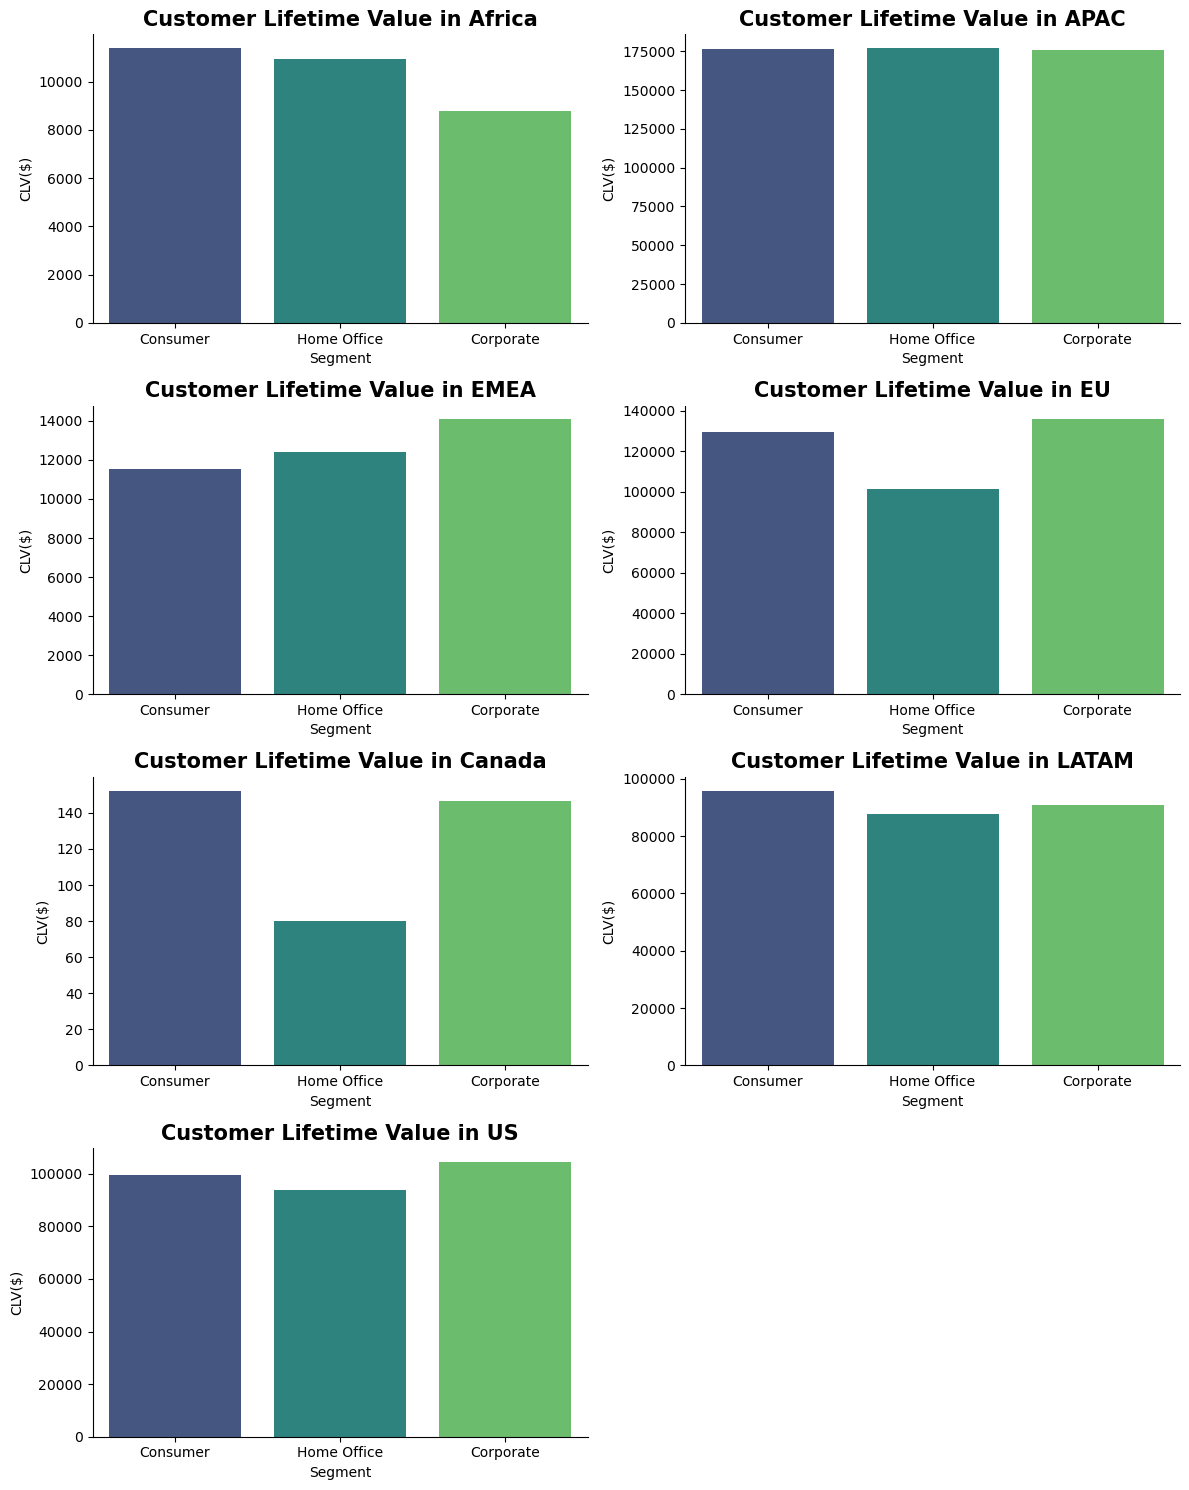

In [11]:
l_markets=len(df['market'].unique())

nrows = 4
ncols = 2

fig,ax=plt.subplots(nrows,ncols,figsize=(12,15))
ax = ax.flatten()

df_clv_sum=df_clv.groupby('Market')['CLV'].sum().to_frame(name='Sum').reset_index()
df_clv_merged=df_clv.merge(df_clv_sum,how='inner',on='Market')

market_list=df['market'].unique().tolist()

for i,market in enumerate(market_list):
    df_market=df_clv_merged[df_clv_merged['Market']==market]
    sns.barplot(data=df_market,x='Segment',y='CLV',hue='Segment',ax=ax[i],palette='viridis')
    sns.despine()
    ax[i].set_title(f'Customer Lifetime Value in {market}',fontsize=15,fontweight='bold')
    ax[i].set_ylabel('CLV($)')
    ax[i].set_xlabel('Segment')
    total_clv = df_clv_sum[df_clv_sum['Market'] == market]['Sum'].values[0]
    handles, labels = ax[i].get_legend_handles_labels()#remove message warnings on legends.
    if handles:
        ax[i].legend(title=f'Total CLV=${total_clv:,.2f}', bbox_to_anchor=(1,1), loc='best')

for j in range(len(market_list), len(ax)):# Hide unused subplots.
    ax[j].axis('off')
    
plt.subplots_adjust(hspace=0.7,wspace=0.3)    
fig.tight_layout()

plt.show()

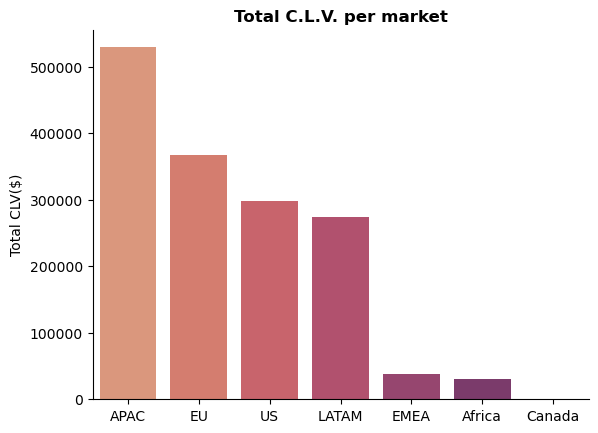

In [12]:
df_clv_sum.sort_values(by='Sum',ascending=False,inplace=True)

sns.barplot(data=df_clv_sum,x='Market',y='Sum',hue='Market',palette='flare')
sns.despine()
plt.ylabel('Total CLV($)')
plt.xlabel('')
plt.title('Total C.L.V. per market',fontweight='bold')
plt.show()